In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 성일정보고등학교 학생 데이터
# 변수명 => SHD

In [2]:
SHD = pd.read_csv('data/1급-기밀파일.csv', encoding='cp949')
SHD.head(1)

,타임스탬프,학년,성별,학과,취미,개인공부시간,공부 시간대,기대연봉,학과 만족여부,전공 선호도,소셜미디어 사용시간,등교시간,하교시간,하교후 가는 곳,학업 스트레스,친구관계,알바,방과후 여부
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),3천만원,O,5,1시간-2시간,10-30분,18시 이후!,학원 또는 방과후,좋음,나쁨,X,O


# 1,2,3학년 별 설문 참여도 (1학년 최고)

In [3]:
SHD['학년'].value_counts()
# 학년별 설문조사 참여 수

1학년    129
2학년    107
3학년     29
Name: 학년, dtype: int64

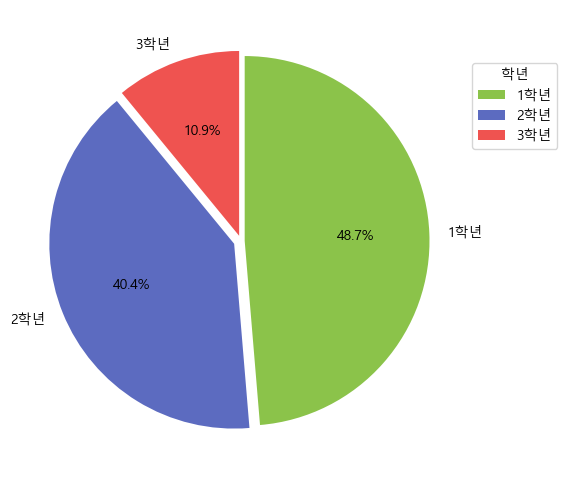

In [4]:
plt.rc('font',family='Malgun Gothic')

plt.figure(figsize=(10,6))
explode=[0.02,0.04,0.03]
colors = ['#8BC34A','#5C6BC0','#EF5350']
labels=['1학년','2학년','3학년']
plt.pie(SHD['학년'].value_counts(),
        labels=labels,
        autopct='%.1f%%',
        counterclock=False,
        startangle=90,
        explode=explode,
        colors=colors,
       )
plt.legend(loc=(1, 0.7),title = '학년')
plt.show()

# 7개 학과 별 설문 참여도 (전산계열이 압도적)

In [5]:
SHD['학과'].value_counts()
# 학과별 설문조사 참여 수

소프트웨어개발과    97
스마트웹콘텐츠과    55
창업마케팅과      42
부사관과        34
금융경영과       28
뷰티디자인과       5
회계정보과        4
Name: 학과, dtype: int64

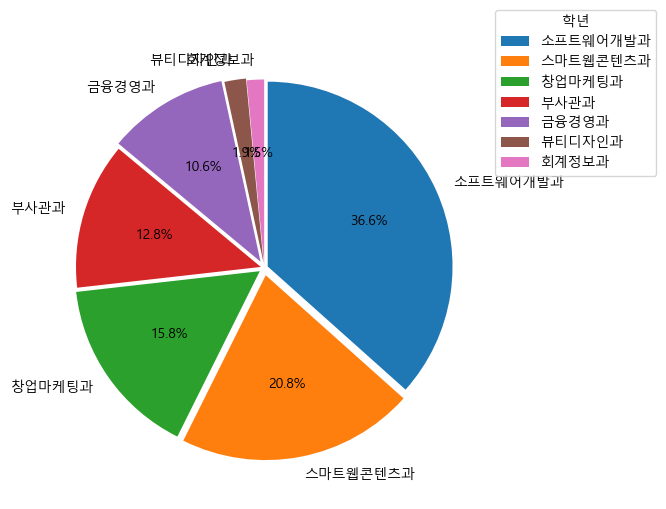

In [6]:
plt.rc('font',family='Malgun Gothic')

plt.figure(figsize=(10,6))
explode=[0.02,0.04,0.03,0.02,0.04,0.03,0.02]
labels=['소프트웨어개발과','스마트웹콘텐츠과','창업마케팅과',
        '부사관과','금융경영과','뷰티디자인과','회계정보과']
plt.pie(SHD['학과'].value_counts(),
        labels=labels,
        autopct='%.1f%%',
        counterclock=False,
        startangle=90,
        explode=explode,
       )
plt.legend(loc=(1, 0.7),title = '학년')
plt.show()

# 학과별에 따른 학년별 설문 참여도

In [7]:
SHD.groupby(['학년','학과'])[['학년']].count()

학년
학년  학과          
1학년 금융경영과     14
    부사관과      23
    소프트웨어개발과  44
    스마트웹콘텐츠과  25
    창업마케팅과    20
    회계정보과      3
2학년 금융경영과     11
    부사관과      11
    소프트웨어개발과  40
    스마트웹콘텐츠과  23
    창업마케팅과    22
3학년 금융경영과      3
    뷰티디자인과     5
    소프트웨어개발과  13
    스마트웹콘텐츠과   7
    회계정보과      1

# 학년별로 추출해 SHD_0 형식으로 변수 저장

In [8]:
SHD_1 = SHD[SHD['학년']=='1학년'] # 1학년 데이터만 추출(변수 저장)
SHD_2 = SHD[SHD['학년']=='2학년'] # 2학년 데이터만 추출(변수 저장)
SHD_3 = SHD[SHD['학년']=='3학년'] # 3학년 데이터만 추출(변수 저장)

# 그래프 예시 테스트

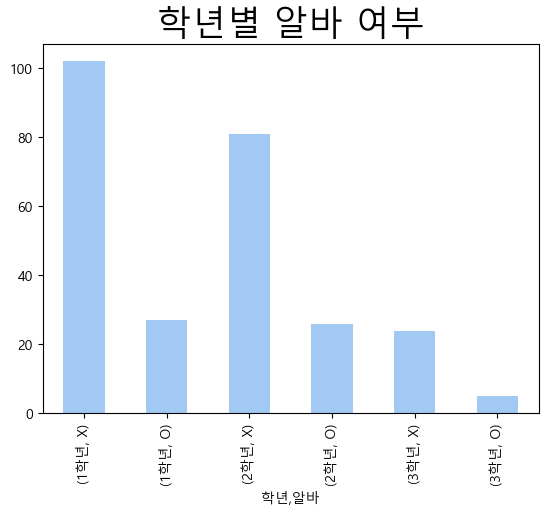

In [9]:
sns.set_palette("pastel")
SHD.groupby('학년')['알바'].value_counts().plot(kind='bar') #학년 그룹 알바 컬럼 나열
plt.rc('font',family='Malgun Gothic') # 텍스트 한글 패치
plt.title('학년별 알바 여부', fontsize=25) # 제목 텍스트 크기
plt.show()

# 전학년 소셜미디어 사용시간

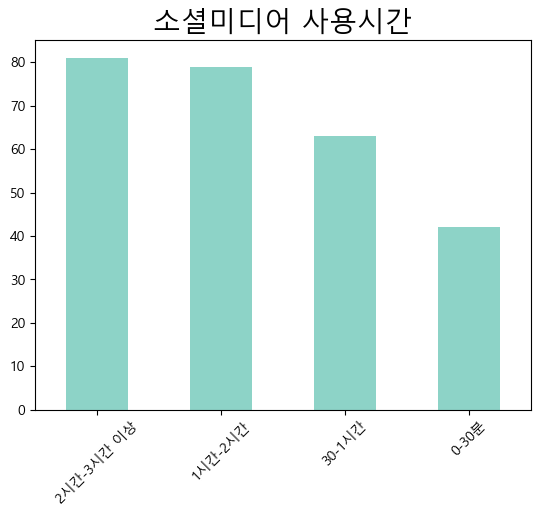

In [10]:
sns.set_palette("Set3")
SHD['소셜미디어 사용시간'].value_counts().plot(kind='bar')
plt.title('소셜미디어 사용시간', fontsize=20) # 제목 텍스트 크기
plt.xticks(rotation=45)
plt.show()

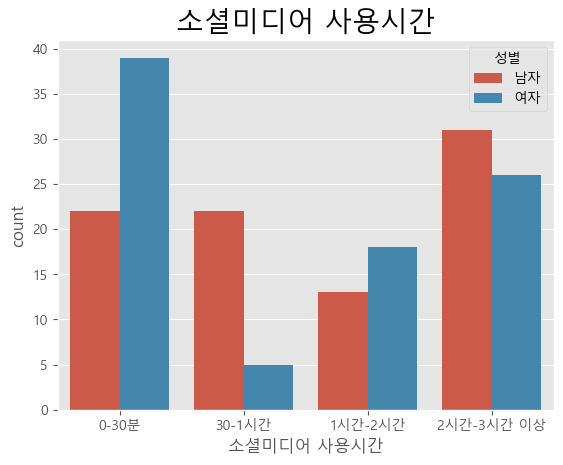

In [27]:
sns.countplot(data=new_SHD, x='소셜미디어 사용시간', hue="성별")
plt.title('소셜미디어 사용시간', fontsize=20)
plt.xticks(range(4),['0-30분','30-1시간','1시간-2시간','2시간-3시간 이상'])

plt.show()

# 성일정보고등학교 전공 선호도는
- 1학년은 평균 6점
- 2학년은 평균 7점
- 3학년은 평균 5점

# 평균적으로 10점 만점 중 6점이다.

<AxesSubplot:xlabel='학년', ylabel='전공 선호도'>

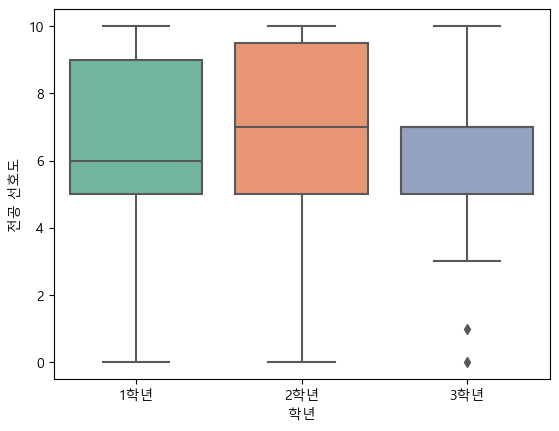

In [12]:
sns.set_palette("Set2")
sns.boxplot(data=SHD, x='학년', y='전공 선호도', order=['1학년','2학년','3학년'])
# 박스 안에 있는 선은 평균을 나타냅니다.

# 학생들의 취미를 조사해보았다

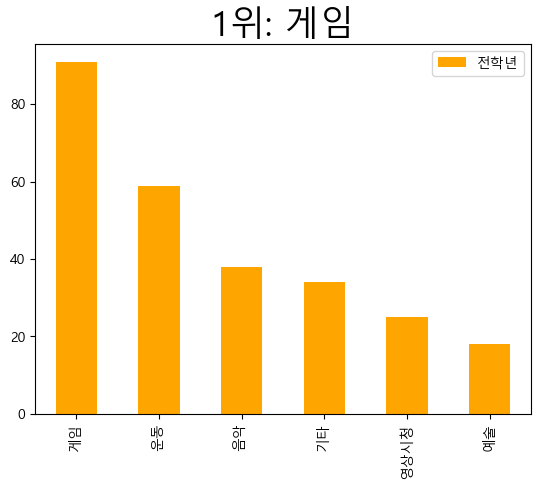

In [13]:
SHD['취미'].value_counts().plot(kind='bar', color='orange', label='전학년')
plt.title('1위: 게임',fontsize=25)
plt.legend()

# new_SHD 변수에 데이터가 동등하게
# 남자를 랜덤으로 88명 뽑아주었다.

In [14]:
male = SHD[SHD['성별']=='남자'].sample(n = 88)
female = SHD[SHD['성별']=='여자']

# 전

In [15]:
from scipy.stats import norm

In [16]:
SHD.head()

,타임스탬프,학년,성별,학과,취미,개인공부시간,공부 시간대,기대연봉,학과 만족여부,전공 선호도,소셜미디어 사용시간,등교시간,하교시간,하교후 가는 곳,학업 스트레스,친구관계,알바,방과후 여부
0,2023. 10. 12 오후 12:21:46,2학년,남자,창업마케팅과,운동,1시간-2시간,방과후(저녁),3천만원,O,5,1시간-2시간,10-30분,18시 이후!,학원 또는 방과후,좋음,나쁨,X,O
1,2023. 10. 12 오후 12:21:49,2학년,남자,창업마케팅과,게임,0-30분,기타,2500,O,5,2시간-3시간 이상,10-30분,바로 집에 가요!,집,나쁨,좋음,X,O
2,2023. 10. 12 오후 12:23:07,3학년,남자,소프트웨어개발과,게임,0-30분,기타,3000,O,7,1시간-2시간,10-30분,바로 집에 가요!,집,좋음,매우 좋음,X,X
3,2023. 10. 12 오후 12:23:25,3학년,남자,소프트웨어개발과,게임,0-30분,밤,3200,O,5,0-30분,10-30분,바로 집에 가요!,집,나쁨,매우 좋음,X,X
4,2023. 10. 12 오후 12:23:28,2학년,남자,창업마케팅과,음악,0-30분,기타,123억,O,5,2시간-3시간 이상,1시간-2시간,18시 이후!,학원 또는 방과후,매우 좋음,매우 좋음,O,X


C:\Users\WIN10\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\WIN10\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


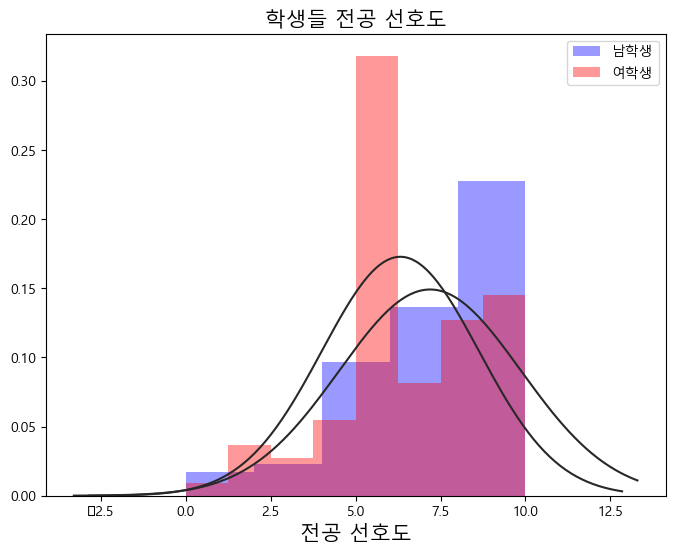

In [17]:
fig = plt.figure(figsize=(8,6))
sns.distplot(male['전공 선호도'], fit=norm, color='b', kde=False, label='남학생')
sns.distplot(female['전공 선호도'], fit=norm, color='r', kde=False, label='여학생')
plt.xlabel('전공 선호도', fontsize=15)
plt.title('학생들 전공 선호도', fontsize = 15)
plt.legend()
plt.show()

In [18]:
SHD['성별'].value_counts()

남자    177
여자     88
Name: 성별, dtype: int64

# 후

In [19]:
new_SHD = pd.concat([male,female])
new_SHD['성별'].value_counts()

남자    88
여자    88
Name: 성별, dtype: int64

Text(0.5, 1.0, '우리학교 학생 성별에 따른 취미')

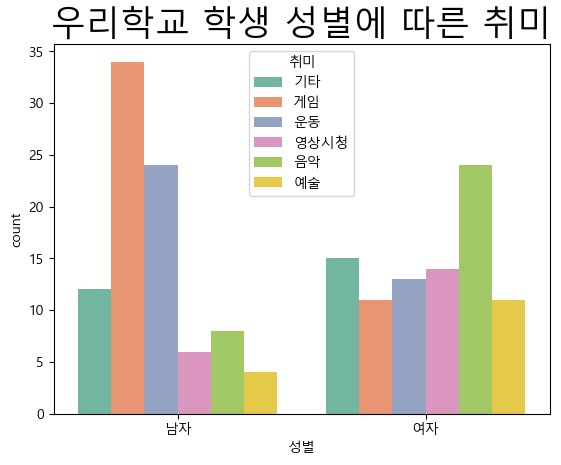

In [20]:
sns.countplot(data=new_SHD, x='성별', hue='취미')
plt.title('우리학교 학생 성별에 따른 취미', fontsize=25)

# 3학년은 방과후를 안 하기 때문에
# SHD_12 라는 변수에 위에 만든 1,2학년을 넣어준다.

In [21]:
SHD_12 = pd.concat([SHD_1,SHD_2])

Text(0.5, 1.0, '1,2학년 방과후 여부')

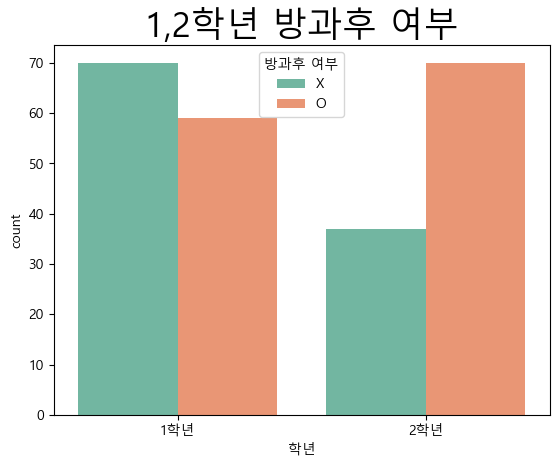

In [22]:
sns.countplot(data=SHD_12, x='학년', hue='방과후 여부')
plt.title('1,2학년 방과후 여부', fontsize=25)

In [23]:
SHD['학년'].value_counts()

1학년    129
2학년    107
3학년     29
Name: 학년, dtype: int64

In [24]:
plt.matplotlib.style.use('ggplot')

# 취미 별 소셜미디어 사용시간

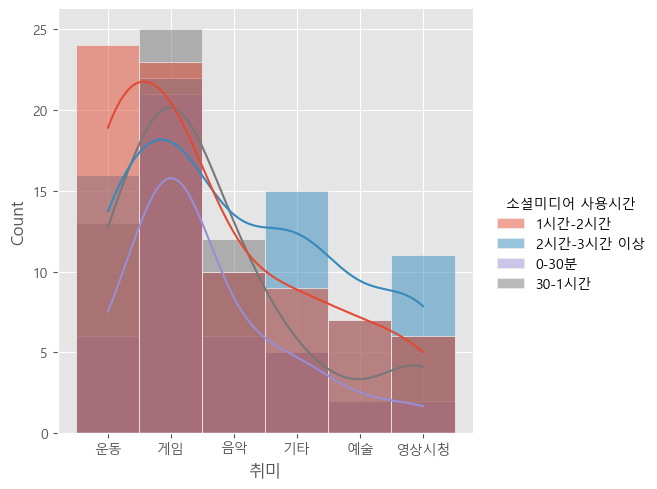

In [26]:
sns.displot(data = SHD,kde=True, x='취미', hue='소셜미디어 사용시간')